<a href="https://colab.research.google.com/github/andrebelem/pythonverse/blob/main/An%C3%A1lise_de_Dados_de_Corrente_%5BNortek_hackday%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas em Python de análise de dados de corrente usando dados do SimCosta

Este material foi preparado para um batepapo de 30 minutos no Hackday da Nortek em 23/07/2024 (veja em https://www.nortekgroup.com/events/hackday-brasil-2024), e contém um exemplo "corrido" trabalhando dados de corrente da boia RJ-4 (Rio de Janeiro) do [SimCosta](https://simcosta.furg.br/home). São apenas exemplos simples, para trabalhar com conceitos gerais ligados a análise de dados de correntometria. Se você encontrar algum erro no código, ou tiver dúvidas, basta entrar em contato pelo email [andrebelem@id.uff.br](mailto:andrebelem@id.uff.br).

Este material segue também a palestra no Hackday e você pode seguir os [slides aqui](https://github.com/andrebelem/pythonverse/blob/main/Hackday%20Nortek%20-%20An%C3%A1lise%20de%20Dados%20de%20Correntes%20(no%20oceano).pdf).

## Primeiros passos

Note que precisamos garantir que sabemos "tudo" sobre essa boia. O código abaixo obtém os dados de configuração do sensor

In [59]:
import requests
import json

# URL do arquivo JSON
url = "https://simcosta.furg.br/q/stations/byName/rj4"

# Fazendo a solicitação HTTP
response = requests.get(url)

# Verificando se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Convertendo a resposta em um objeto Python
    data = response.json()
    # Imprimindo o conteúdo do arquivo JSON formatado
    print(json.dumps(data, indent=4))
else:
    # Se a solicitação falhar, imprime o código de status
    print("Erro ao acessar o arquivo JSON. Código de status:", response.status_code)

# neste caso o ADCP-header é null e vamos assumir que este é um Aquadopp normal.

{
    "id": 12,
    "name": "rj4",
    "name_display": "RJ-4",
    "installation": "2017-08-28T13:01:00.000Z",
    "city": "Rio de Janeiro",
    "state": "RJ",
    "responsible": "UFRJ",
    "header": "/L1 data \n/missing = NULL\n/Acknowledging or Crediting SiMCosta as Information Source : (Product or data name) courtesy of the Brazilian Coastal Monitoring System - SiMCosta  (www.simcosta.furg.br), Universidade Federal do Rio Grande - FURG./Disclaimer: All products published on this website are not intended to be used for navigational or operational purposes.\n/*Magnetic Declination Reference: Chulliat, A., S. Macmillan, P. Alken, C. Beggan, M. Nair, B. Hamilton, A. Woods, V. Ridley, S. Maus and A. Thomson, 2014. The US/UK World Magnetic Model for 2015-2020, NOAA National Geophysical Data Center, Boulder, CO, doi: 10.7289/V5TH8JNW\n/Anemometer measuring height: 3.0m",
    "adcp_header": "/sensor_mount = Buoy\n/ADCP_orientation = Downward\n\n/ADCP config:\n/Starting measuring depth (m) 

In [60]:
# Exemplo, extrai os dados em um determinaro período da boia ID 12 (que é a RJ-4)

import pandas as pd # repetindo aqui, por ser um snippet
import urllib
import json
from datetime import datetime

time1 = datetime(2024, 7, 15).timestamp() # note que a construção agora usa *timestamp*
time2 = datetime(2024, 7, 22).timestamp()

print(f'Recuperando dados nos tempos:\n'\
      f'time2 = {datetime.fromtimestamp(time1).strftime("%Y-%m-%d %H:%M:%S")}\n'\
      f'time1 = {datetime.fromtimestamp(time2).strftime("%Y-%m-%d %H:%M:%S")}')

url = f'https://simcosta.furg.br/api/intrans_data?boiaID=12&type=json&time1={int(time1)}&time2={int(time2)}&params=perfil_correntes'

# chamando os dados da boia pela api
df = pd.json_normalize(json.loads(urllib.request.urlopen(url).read()))
# e construindo o array de tempo datetime

# note que pode ser feito diretamente das colunas de tempo ou do timestamp
#df['timestamp'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND']])
df = df.drop(columns=['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
# set the timestamp as the index
df.set_index('timestamp', inplace=True)
df.head(5)


Recuperando dados nos tempos:
time2 = 2024-07-15 00:00:00
time1 = 2024-07-22 00:00:00


,Avg_Cell(001)_dir_n,Avg_Cell(002)_dir_n,Avg_Cell(003)_dir_n,Avg_Cell(004)_dir_n,Avg_Cell(005)_dir_n,Avg_Cell(006)_dir_n,Avg_Cell(007)_dir_n,Avg_Cell(008)_dir_n,Avg_Cell(009)_dir_n,Avg_Cell(010)_dir_n,...,Avg_Cell(090)_mag,Avg_Cell(091)_mag,Avg_Cell(092)_mag,Avg_Cell(093)_mag,Avg_Cell(094)_mag,Avg_Cell(095)_mag,Avg_Cell(096)_mag,Avg_Cell(097)_mag,Avg_Cell(098)_mag,Avg_Cell(099)_mag
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-07-15 00:21:40+00:00,334.893,324.893,295.893,278.893,261.893,258.893,238.893,238.893,234.893,228.893,...,None,None,None,None,None,None,None,None,None,None
2024-07-15 00:51:40+00:00,274.893,296.893,255.893,233.893,212.893,246.893,252.893,233.893,204.893,186.893,...,None,None,None,None,None,None,None,None,None,None
2024-07-15 01:21:40+00:00,154.893,97.893,96.893,129.893,132.893,87.893,156.893,253.893,143.893,209.893,...,None,None,None,None,None,None,None,None,None,None
2024-07-15 01:51:40+00:00,226.893,231.893,216.893,206.893,213.893,231.893,226.893,214.893,208.893,215.893,...,None,None,None,None,None,None,None,None,None,None
2024-07-15 02:21:40+00:00,246.893,324.893,219.893,225.893,233.893,235.893,199.893,221.893,221.893,238.893,...,None,None,None,None,None,None,None,None,None,None


In [61]:
# sempre verifique o delta-t
delta_t = df.index.to_series().diff().median()
print(f'O Delta-T dos perfis é {delta_t}') # use median porque pode haver interrupções na série


O Delta-T dos perfis é 0 days 00:30:00


**Informação importante**: você DEVE conhecer a estrutura de dados da boia ANTES de baixar os dados, como a profundidade em que está instalada, o blank e o tamanho da célula do correntômtreo, já que a API recupera apenas os dados medidos. Uma dica: quando você baixa os dados do site em CSV ou Tab, note que as primeiras linhas do arquivo contém todas as informações de cabeçalho com um descritor importante.

Então, para a RJ-4 temos: Nortek Aquadopp
- Number of Cells = 20
- Cell Size (m) = 1
- Blanking Distance (m) = 0.5
- Sensor head depth (m) = 0.48

Estes dados estão no header que vem no arquivo csv.


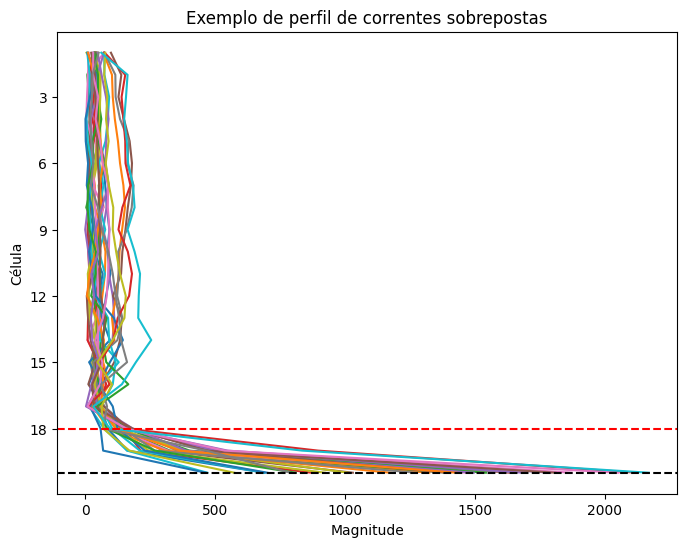

In [62]:
# Então eu posso selecionar apenas as velocidades da corrente, nos campos onde a coluna tem o nome "_mag"
speed = pd.concat([df[col] for col in df.columns if col.endswith('_mag')], axis=1)
# Vou aproveitar e separar a direção, nos campos onde a coluna tem o nome "_dir_n"
direction = pd.concat([df[col] for col in df.columns if col.endswith('_dir_n')], axis=1)

# veja o que esta parte do script faz....
import matplotlib.pyplot as plt
import numpy as np

# Criar uma figura e eixos
fig, ax = plt.subplots(figsize=(8, 6))

# Pulando a cada 2 horas, considerando que o delta-T é de 30 min
for i in np.arange(0, 120, 4):
    ax.plot(speed.iloc[i, :].astype(float), np.arange(1, speed.shape[1] + 1).astype(int)) # construindo perfil de correntes

# Adicionando uma linha horizontal em y=18 e y=20
ax.axhline(y=18, color='r', linestyle='--') # note que este é o número de células indicado no arquivo.
ax.axhline(y=20, color='k', linestyle='--')

# Inverter o eixo y
ax.invert_yaxis()

# Definir os ticks do eixo y como inteiros
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Adicionando rótulos aos eixos e título ao gráfico
ax.set_xlabel('Magnitude')
ax.set_ylabel('Célula')
ax.set_title('Exemplo de perfil de correntes sobrepostas')

# Exibir o gráfico
plt.show()


Por último, vamos então plotar na forma 2D a magnitude das correntes por tempo, usando uma escala de cores, e cortando em 20 células que é a informação que consta como "válida" da boia (mas considerando que até a célula 17 ou 18 é que vale).

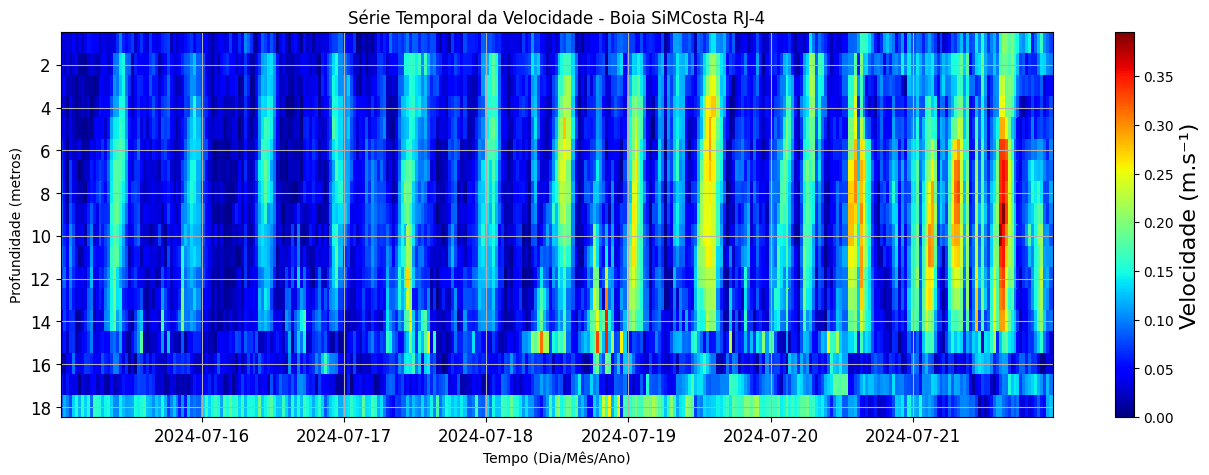

In [63]:
import matplotlib.pyplot as plt
import numpy as np

num_cells = 18 # numero de células para cortar

mag = speed.iloc[:, :num_cells].astype(float)/1000 # separa apenas até a coluna de corte como float e já passa para m/s

fig, ax = plt.subplots(figsize=(16, 5))

# lembrando ...
sensor_head_depth = 0.48  # metros
blanking_distance = 0.5   # metros
cell_size = 1             # metros

profundidade = sensor_head_depth + blanking_distance + (np.arange(num_cells)) * cell_size

p = ax.pcolor(df.index, profundidade, mag.T, shading='auto',cmap="jet") # note que estou transpondo a matriz

plt.box(True)
plt.grid(True)
plt.ylabel('Profundidade (metros)')
plt.xlabel('Tempo (Dia/Mês/Ano)')
plt.title(f'Série Temporal da Velocidade - Boia SiMCosta RJ-4')
plt.gca().invert_yaxis()
plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.colorbar(p).set_label('Velocidade (m.s⁻¹)', fontsize=16)
plt.show()

Vamos agora ao básico - histograma de frequência das magnitudes .... e rosa "das correntes" para as direções.

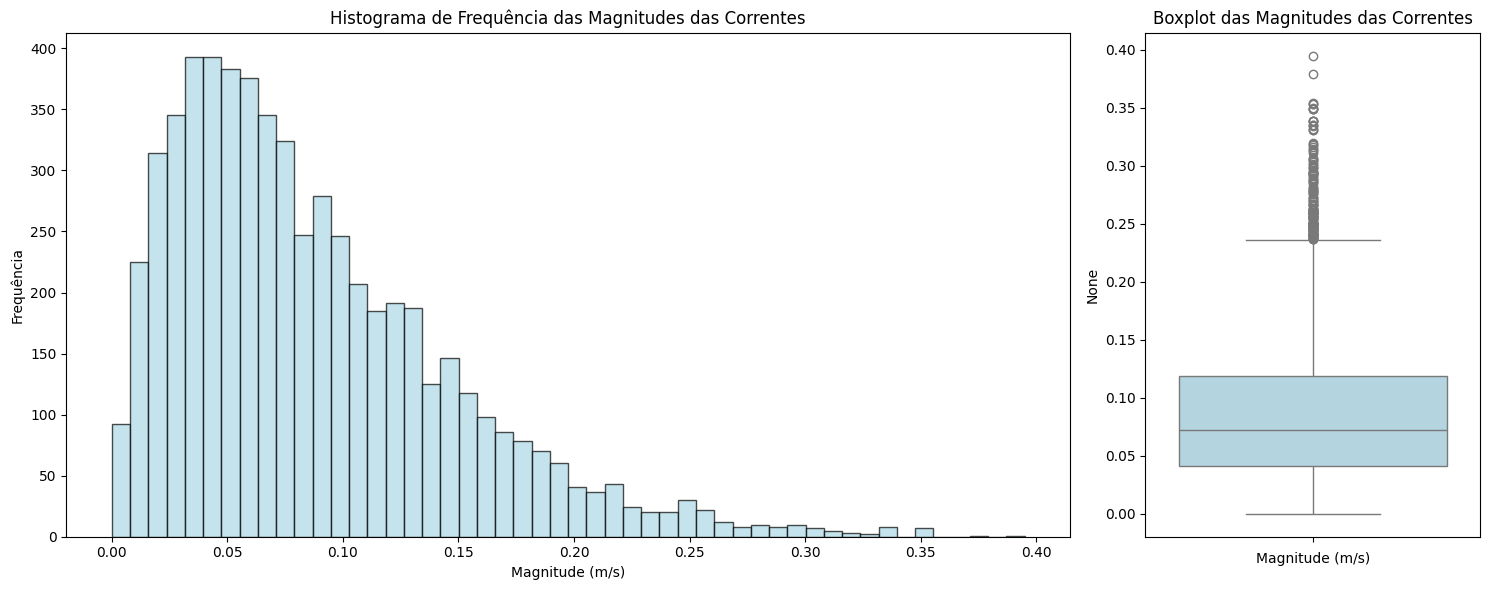

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Concatenar todas as magnitudes em uma única série
all_magnitudes = pd.concat([mag[col] for col in mag.columns], axis=0)

# Configurar o layout das figuras
fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(15, 6))

# Configurar o histograma
ax1.hist(all_magnitudes, bins=50, color='lightblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Magnitude (m/s)')
ax1.set_ylabel('Frequência')
ax1.set_title('Histograma de Frequência das Magnitudes das Correntes')
ax1.grid(False)

# Configurar o boxplot
sns.boxplot(y=all_magnitudes, ax=ax2, color='lightblue')
ax2.set_xlabel('Magnitude (m/s)')
ax2.set_title('Boxplot das Magnitudes das Correntes')
ax2.grid(False)

# Exibir as figuras
plt.tight_layout()
plt.show()


In [65]:
# Da mesma forma que fizemos acima, vou olhar a direção das correntes.
dir = direction.iloc[:, :num_cells].astype(float) # note que é em graus N.
dir

,Avg_Cell(001)_dir_n,Avg_Cell(002)_dir_n,Avg_Cell(003)_dir_n,Avg_Cell(004)_dir_n,Avg_Cell(005)_dir_n,Avg_Cell(006)_dir_n,Avg_Cell(007)_dir_n,Avg_Cell(008)_dir_n,Avg_Cell(009)_dir_n,Avg_Cell(010)_dir_n,Avg_Cell(011)_dir_n,Avg_Cell(012)_dir_n,Avg_Cell(013)_dir_n,Avg_Cell(014)_dir_n,Avg_Cell(015)_dir_n,Avg_Cell(016)_dir_n,Avg_Cell(017)_dir_n,Avg_Cell(018)_dir_n
timestamp,,,,,,,,,,,,,,,,,,
2024-07-15 00:21:40+00:00,334.893,324.893,295.893,278.893,261.893,258.893,238.893,238.893,234.893,228.893,216.893,220.893,208.893,198.893,202.893,297.893,339.893,242.893
2024-07-15 00:51:40+00:00,274.893,296.893,255.893,233.893,212.893,246.893,252.893,233.893,204.893,186.893,189.893,172.893,163.893,156.893,175.893,219.893,46.893,235.893
2024-07-15 01:21:40+00:00,154.893,97.893,96.893,129.893,132.893,87.893,156.893,253.893,143.893,209.893,206.893,189.893,194.893,199.893,235.893,283.893,332.893,243.893
2024-07-15 01:51:40+00:00,226.893,231.893,216.893,206.893,213.893,231.893,226.893,214.893,208.893,215.893,219.893,216.893,217.893,216.893,218.893,248.893,334.893,254.893
2024-07-15 02:21:40+00:00,246.893,324.893,219.893,225.893,233.893,235.893,199.893,221.893,221.893,238.893,240.893,236.893,247.893,263.893,260.893,279.893,325.893,235.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-21 21:21:40+00:00,224.892,205.892,93.892,131.892,172.892,191.892,183.892,185.892,193.892,191.892,200.892,206.892,213.892,216.892,222.892,146.892,256.892,72.892
2024-07-21 21:51:40+00:00,273.892,257.892,321.892,332.892,306.892,272.892,262.892,260.892,261.892,257.892,253.892,245.892,244.892,244.892,248.892,165.892,248.892,66.892
2024-07-21 22:21:40+00:00,259.892,225.892,19.892,231.892,243.892,240.892,239.892,246.892,238.892,234.892,244.892,244.892,253.892,255.892,258.892,111.892,252.892,70.892


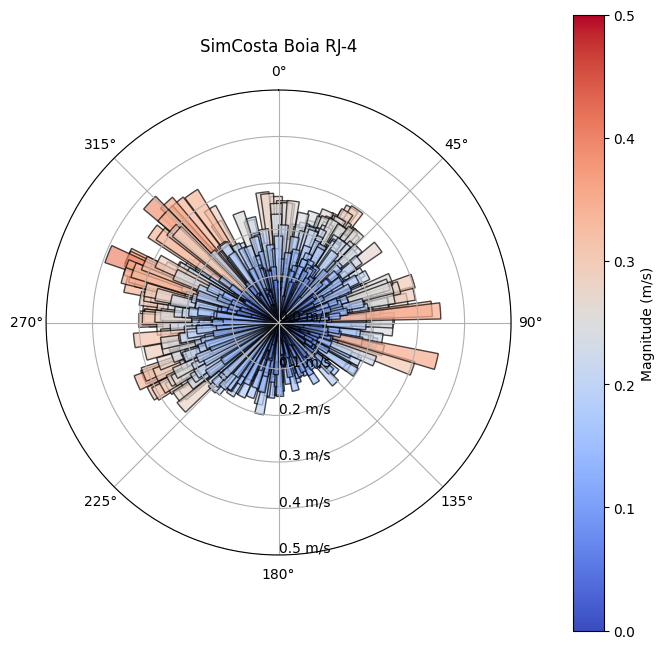

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Concatenar todas as magnitudes em uma única série
magnitudes = pd.concat([mag[col] for col in mag.columns], axis=0)

# Converte a direção de graus para radianos
directions_radians = np.radians(pd.concat([dir[col] for col in dir.columns], axis=0))

# Concatenar todas as magnitudes e direções em uma única série
magnitudes = pd.concat([mag[col] for col in mag.columns], axis=0)
directions_radians = np.radians(pd.concat([dir[col] for col in dir.columns], axis=0))

# Cria um colormap de azul a vermelho
cmap = plt.get_cmap('coolwarm')
norm = Normalize(vmin=0, vmax=0.5)
colors = cmap(norm(magnitudes))

# Cria o gráfico de rosa dos ventos
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Ajusta o eixo de direção (0° no topo, no sentido horário)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Plota a rosa dos ventos
bars = ax.bar(directions_radians, magnitudes, width=0.1, color=colors, edgecolor='black', alpha=0.7)

# Adiciona rótulos
ax.set_title('SimCosta Boia RJ-4', va='bottom')
ax.set_rlabel_position(180)
yticks = np.arange(0, 0.6, 0.1)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{i:.1f} m/s' for i in yticks])

# Adiciona uma barra de cores para mostrar a escala
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.1)
cbar.set_label('Magnitude (m/s)')

plt.show()

Agora, pense comigo....
### Vantagens e Desvantagens de Decompor/Recompor Vetores de Corrente

| Aspecto                     | U e V                                                              | Magnitude e Direção                                                               |
|--------------------|--------------------------------------|------------------------------|
| **Cálculos**                | Facilidade de cálculo com álgebra vetorial                         | Intuitivo para cálculos simples, adequado para previsões práticas.                |
| **Interpretação**           | Interpretação em estudos de modelagem                              | Mais fácil de entender e visualizar, intuitivo para quem trabalha com direção.    |
| **Análise Estatística**     | Útil para calcular variabilidade e turbulência, com algum detalhe  | Direto em aplicações práticas e previsões, facilita a comparação com dados        |
| **Aplicações Práticas**     | Necessidade de transformação para magnitude e direção              | Melhor para comunicação com não-especialistas, facilita a integração com sistemas |
| **Visualização**            | Pode ser menos intuitivo para visualização gráfica                 | Mais intuitivo para criação de gráficos e mapas, melhora a clareza na apresentação|


Para transformar magnitude e direção de um vetor para a forma complexa, você pode usar as fórmulas que envolvem trigonometria. A forma complexa de um vetor é dada por:

$z = \text{magnitude} \times (\cos(\text{direção}) + i \sin(\text{direção})) $

Aqui, a magnitude é o comprimento do vetor, e a direção é o ângulo em radianos que o vetor faz com o eixo x. Poré, lembre-se que para converter magnitude e direção (em graus) de vetores de corrente onde o azimute é em relação ao norte, você pode seguir os passos abaixo. Lembre-se que, em oceanografia, a direção da corrente é geralmente definida como o ângulo em que a corrente está fluindo, medido em graus a partir do norte (0°).


In [67]:
import numpy as np

def current_vector_to_complex(magnitude, direction_degrees):
    # Converta a direção de graus para radianos
    direction_radians = np.radians(direction_degrees)

    # Calcule a componente u (leste-oeste) e v (norte-sul)
    u = magnitude * np.sin(direction_radians)
    v = magnitude * np.cos(direction_radians)

    # Crie o número complexo
    complex_vector = u + 1j * v

    return complex_vector

# Exemplo de uso
magnitude = 5
direction_degrees = 45
complex_vector = current_vector_to_complex(magnitude, direction_degrees)
print(complex_vector)


(3.5355339059327373+3.5355339059327378j)


Então vamos considerar o vetor complexo (calculado com base em Magnitude e Direção) e determinar que outliers são aqueles que caem fora da faixa de 3x o desvio padrão.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Converta magnitudes e direções para vetores complexos
complex_vectors = magnitudes * np.exp(1j * directions_radians)

# Calcular a média e o desvio padrão dos vetores complexos
mean_vector = np.mean(complex_vectors)
std_vector = np.std(complex_vectors)

# Definir os limites de outlier (3 desvios padrão da média)
upper_limit = mean_vector + 3 * std_vector
lower_limit = mean_vector - 3 * std_vector

# Função para identificar outliers baseada na magnitude
def is_outlier(vector, mean, std):
    return np.abs(vector - mean) > 3 * std

# Identificar outliers
outliers = np.array([is_outlier(vector, mean_vector, std_vector) for vector in complex_vectors])

# Separar os outliers
outlier_vectors = complex_vectors[outliers]
non_outlier_vectors = complex_vectors[~outliers]

# Exibir resultados
print(f'Outliers: {len(outlier_vectors)}')
print(f'Non-Outliers: {len(non_outlier_vectors)}')

Outliers: 0
Non-Outliers: 5832


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Agora, se estivessemos olhando as componentes U e V, o que iria aparecer ?
lembrando que `magnitudes` estão em m/s e `directions_radians` é a direção em radianos relativa à 0°N, teremos ...

In [69]:
import numpy as np

# Calcular componentes U e V
U = magnitudes * np.sin(directions_radians)
V = magnitudes * np.cos(directions_radians)

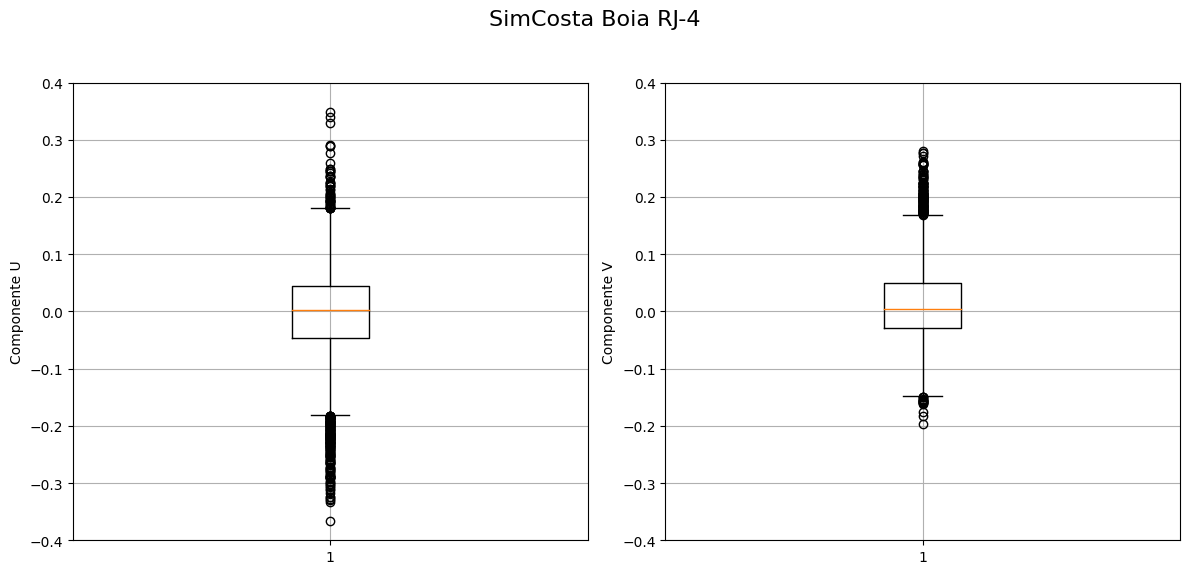

In [70]:
# Criar a figura e eixos para os boxplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Definir limites comuns
ylim = (-0.4, 0.4)

# Boxplot para a componente U
axs[0].boxplot(U)
#axs[0].set_title('Boxplot de U')
axs[0].set_ylabel('Componente U')
axs[0].set_ylim(ylim)
axs[0].grid(True)

# Boxplot para a componente V
axs[1].boxplot(V)
#axs[1].set_title('Boxplot de V')
axs[1].set_ylabel('Componente V')
axs[1].set_ylim(ylim)
axs[1].grid(True)

# Ajustar layout para evitar sobreposição
plt.suptitle('SimCosta Boia RJ-4', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Exibir os gráficos
plt.show()

Não há um histograma tradicional para números complexos diretamente, pois histogramas geralmente representam a distribuição de valores unidimensionais, enquanto números complexos possuem duas dimensões (parte real e parte imaginária). No entanto, podemos visualizar a distribuição de números complexos usando gráficos bidimensionais que mostram a densidade de pontos no plano complexo.

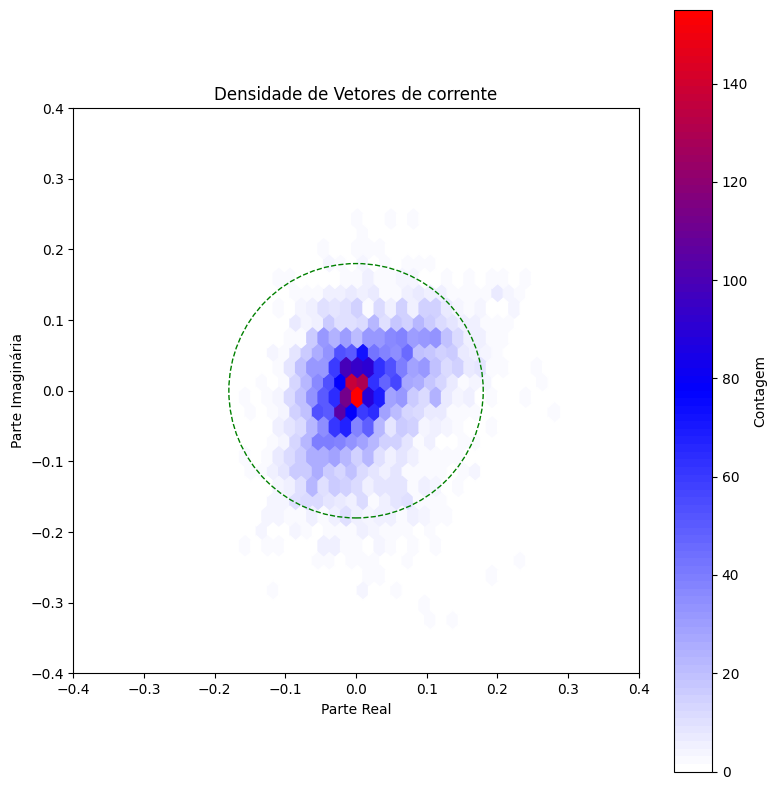

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Separar parte real e imaginária
real_parts = complex_vectors.values.real
imag_parts = complex_vectors.values.imag

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 8))  # Mantendo a figura quadrada

# Criar um colormap personalizado
colors = [(1, 1, 1), (0, 0, 1), (1, 0, 0)]  # Branco, Azul, Vermelho
n_bins = 100  # Número de gradientes no colormap
cmap_name = 'custom_blue_red'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Criar um gráfico de densidade bidimensional
hb = ax.hexbin(real_parts, imag_parts, gridsize=30, cmap=cm)
cb = fig.colorbar(hb, ax=ax, label='Contagem')

# Adicionar rótulos e título
ax.set_xlabel('Parte Real')
ax.set_ylabel('Parte Imaginária')
ax.set_xlim([-0.4, 0.4])
ax.set_ylim([-0.4, 0.4])
ax.set_title('Densidade de Vetores de corrente')

# Adicionar um círculo com raio 0.25
circle = plt.Circle((0, 0), 0.18, color='green', fill=False, linestyle='--', linewidth=1)
ax.add_artist(circle)

# Garantir que o gráfico tenha a proporção 1:1
ax.set_aspect('equal', adjustable='box')

# Exibir o gráfico
plt.tight_layout()
plt.show()



## Agora vamos à estatística temporal e variância

Considerando que a matriz `mag` (com as magnitudes) tem dimensão tempo x profundidade, podemos levantar a distribuição de variância

In [72]:
import pandas as pd
import numpy as np

# Supondo que mag seja o seu dataframe com magnitude e profundidade seja o array de profundidades
# Index de 'mag' é o tempo com delta-t de 30 minutos
# profundidade é um array com as profundidades

# Defina o tamanho da janela para o tempo e espaço
window_time = '2H'  # 2 horas
window_space = 4  # 4 níveis de profundidade (aproximadamente 2 metros se o espaço entre níveis for 0.5 metros)

# Resample para garantir intervalos de tempo de 30 minutos
mag_resampled = mag.resample('30T').mean()

# Função para calcular a variância em uma janela 2D
def rolling_variance_2d(df, window_time, window_space):
    var_2d = np.full(df.shape, np.nan)
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            time_start = max(0, i - window_time)
            time_end = min(df.shape[0], i + window_time + 1)
            space_start = max(0, j - window_space)
            space_end = min(df.shape[1], j + window_space + 1)
            window = df.iloc[time_start:time_end, space_start:space_end].values
            var_2d[i, j] = np.nanvar(window)
    return pd.DataFrame(var_2d, index=df.index, columns=df.columns)

# Calcular a variância em 2D
var_2d = rolling_variance_2d(mag_resampled, 2 * int(window_time[:-1]), window_space)



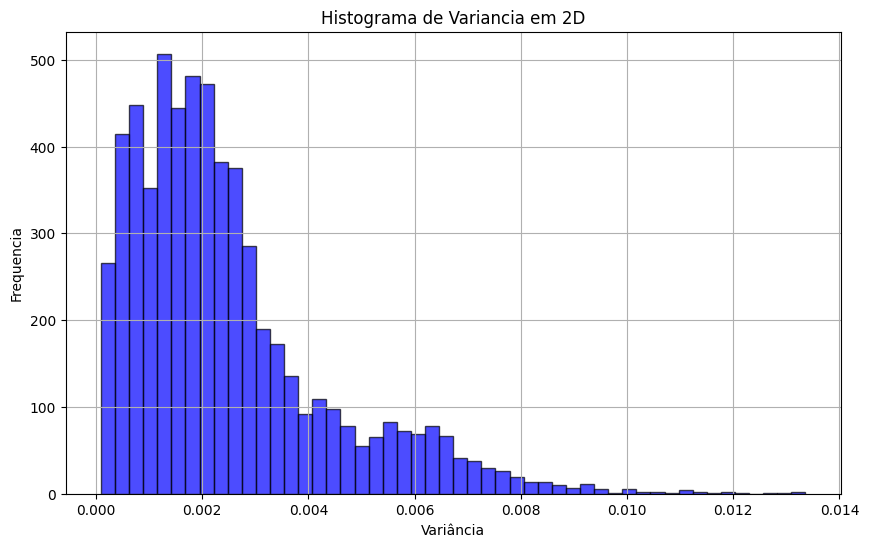

In [73]:
import matplotlib.pyplot as plt

# Flatten var_2d to create a 1D array for the histogram
var_2d_flat = var_2d.values.flatten()

# Remove NaN values
var_2d_flat = var_2d_flat[~np.isnan(var_2d_flat)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(var_2d_flat, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Variância')
plt.ylabel('Frequencia')
plt.title('Histograma de Variancia em 2D')
plt.grid(True)
plt.show()


Note que a variância é uma medida estatística que quantifica a dispersão dos dados em torno da média (neste caso, a média dos pontos das janelas de tempo e espaço). No contexto dos vetores de corrente, a variância indica a variação das magnitudes das correntes em relação à média em uma determinada janela.

Podemos interpretar da seguinte forma:
- Alta Variância: Se a variância é alta, isso indica que há uma grande variação nas magnitudes das correntes dentro da janela de tempo e espaço especificada. Em outras palavras, as correntes variam significativamente de um momento para outro e/ou de uma profundidade para outra.

- Baixa Variância: Se a variância é baixa, isso indica que as magnitudes das correntes são bastante consistentes dentro da janela de tempo e espaço especificada. Isso significa que as correntes têm magnitudes semelhantes ao longo do tempo e da profundidade (ambas).

Note então que são esperadas BAIXAS variâncias em ambientes sem estratificação, e quando elas aumentam, isso pode significar aumento na estratificação (neste caso !).

A unidade de `var_2d` é o quadrado da unidade original das magnitudes das correntes. Se as magnitudes das correntes (mag) estão em metros por segundo (m/s), a variância estará em metros quadrados por segundo quadrado (m²/s²).

Observe a distribuição das variâncias no histograma. Um histograma com uma longa cauda para a direita indica a presença de alguns períodos e/ou profundidades com variações significativas nas correntes.

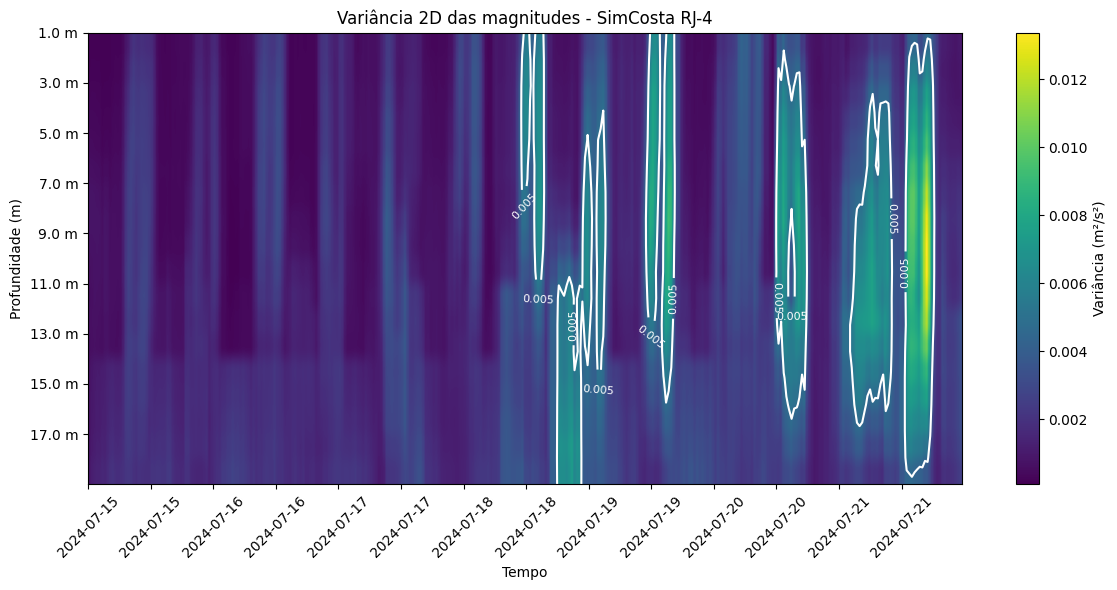

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the 2D variance as an image
plt.figure(figsize=(12, 6))
plt.imshow(var_2d.T, aspect='auto', origin='lower', cmap='viridis', extent=[0, len(var_2d.index), 0, len(var_2d.columns)])
plt.colorbar(label='Variância (m²/s²)')
plt.xlabel('Tempo')
plt.ylabel('Profundidade (m)')
plt.title('Variância 2D das magnitudes - SimCosta RJ-4')

# Melhorar os rótulos do eixo X para mostrar datas reduzidas
plt.xticks(ticks=np.arange(0, len(var_2d.index), step=24), labels=var_2d.index[::24].strftime('%Y-%m-%d'), rotation=45)
plt.yticks(ticks=np.arange(0, len(var_2d.columns), step=2), labels=[f'{p:.1f} m' for p in profundidade[::2]])

# Inverter o eixo y
plt.gca().invert_yaxis()

# Adicionar contornos em branco no nível 0.005 de variância
contours = plt.contour(var_2d.T, levels=[0.005], colors='white', extent=[0, len(var_2d.index), 0, len(var_2d.columns)])
plt.clabel(contours, inline=True, fontsize=8, fmt='%.3f', colors='white')

plt.tight_layout()
plt.show()


Agora, imagine que vamos decompor esses vetores de magnitude em uma rotação de 22°, já que a boia está localizada atrás da ilha de Cotunduba, onde o canal de acesso ao porto (que é dragado e profundo) fica em um azimute de 22° em relação ao norte.

É muito mais SIMPLES rotacionar e decompor os vetores, que vamos chamar de `along_vec` e `cross_vec`, para as componentes *along channel* e *cross channel*.

In [75]:
import numpy as np
import pandas as pd

# Supondo que 'mag' e 'dir' são dataframes com as magnitudes e direções em graus
# Certifique-se de que ambos os dataframes têm o mesmo índice e as mesmas colunas

# Converter a direção de graus para radianos
dir_radians = np.radians(dir.values)

# Calcular as componentes complexas dos vetores de corrente
vectors = mag.values * np.exp(1j * dir_radians)

# Criar um dataframe com os vetores complexos
vectors_df = pd.DataFrame(data=vectors, index=mag.index, columns=profundidade)
vectors_df.head(5)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,0.98,1.98,2.98,3.98,4.98,5.98,6.98,7.98,8.98,9.98,10.98,11.98,12.98,13.98,14.98,15.98,16.98,17.98
timestamp,,,,,,,,,,,,,,,,,,
2024-07-15 00:21:40+00:00,0.032599-0.015275j,0.035995-0.025305j,0.021398-0.044081j,0.005565-0.035567j,-0.007615-0.053460j,-0.013292-0.067708j,-0.039781-0.065928j,-0.042881-0.071065j,-0.053485-0.076081j,-0.055885-0.064046j,-0.077577-0.058231j,-0.060475-0.052372j,-0.061287-0.033822j,-0.045414-0.015542j,-0.043298-0.018284j,0.006550-0.012374j,0.056343-0.020626j,-0.039642-0.077444j
2024-07-15 00:51:40+00:00,0.002559-0.029891j,0.007690-0.015161j,-0.010968-0.043643j,-0.016500-0.022622j,-0.030229-0.019551j,-0.014913-0.034951j,-0.014414-0.046832j,-0.030643-0.042012j,-0.048983-0.022730j,-0.060559-0.007321j,-0.070929-0.012370j,-0.090301+0.011259j,-0.067252+0.019420j,-0.067143+0.028649j,-0.055856+0.004011j,-0.006905-0.005772j,0.019818+0.021172j,-0.066728-0.098531j
2024-07-15 01:21:40+00:00,-0.029882+0.014002j,-0.004806+0.034668j,-0.002400+0.019855j,-0.004489+0.005371j,-0.011571+0.012455j,0.000331+0.008994j,-0.003679+0.001570j,-0.002219-0.007686j,-0.014543+0.010607j,-0.041614-0.023922j,-0.046376-0.023521j,-0.049257-0.008590j,-0.049287-0.013108j,-0.050778-0.018374j,-0.014019-0.020700j,0.009364-0.037859j,0.051629-0.026428j,-0.045325-0.092491j
2024-07-15 01:51:40+00:00,-0.019818-0.021172j,-0.009874-0.012590j,-0.017595-0.013207j,-0.035674-0.018093j,-0.033203-0.022306j,-0.025920-0.033048j,-0.050569-0.054026j,-0.059876-0.041759j,-0.073544-0.040587j,-0.085872-0.062145j,-0.086699-0.072473j,-0.079176-0.059432j,-0.070235-0.054663j,-0.052784-0.039621j,-0.052147-0.042067j,-0.016565-0.042914j,0.033504-0.015699j,-0.019807-0.073374j
2024-07-15 02:21:40+00:00,-0.018445-0.043229j,0.024542-0.017253j,-0.013810-0.011544j,-0.013224-0.013643j,-0.013554-0.018582j,-0.014019-0.020700j,-0.034792-0.012590j,-0.028287-0.025374j,-0.046897-0.042068j,-0.040298-0.066784j,-0.036970-0.066402j,-0.036049-0.055285j,-0.021075-0.051883j,-0.007021-0.065625j,-0.010921-0.068130j,0.015978-0.091617j,0.030636-0.020747j,-0.074018-0.109295j


In [76]:
import numpy as np
import pandas as pd

# Note que 'vectors_df' é o dataframe com os vetores complexos
# Definir os vetores ao longo do plano de azimute 22° e o vetor ortogonal
azimute = 22
azimute_rad = np.radians(azimute)

# Vetor unitário ao longo do azimute 22°
along_vec = np.exp(1j * azimute_rad)

# Vetor ortogonal (90° a partir do azimute)
cross_vec = np.exp(1j * (azimute_rad + np.pi / 2))

# Extrair as componentes ao longo e ortogonal
along_component = np.real(vectors_df.values * along_vec)
cross_component = np.real(vectors_df.values * cross_vec)

# Criar dataframes para as componentes along e cross
along_component_df = pd.DataFrame(data=along_component, index=vectors_df.index, columns=vectors_df.columns)
cross_component_df = pd.DataFrame(data=cross_component, index=vectors_df.index, columns=vectors_df.columns)


E plotando ....

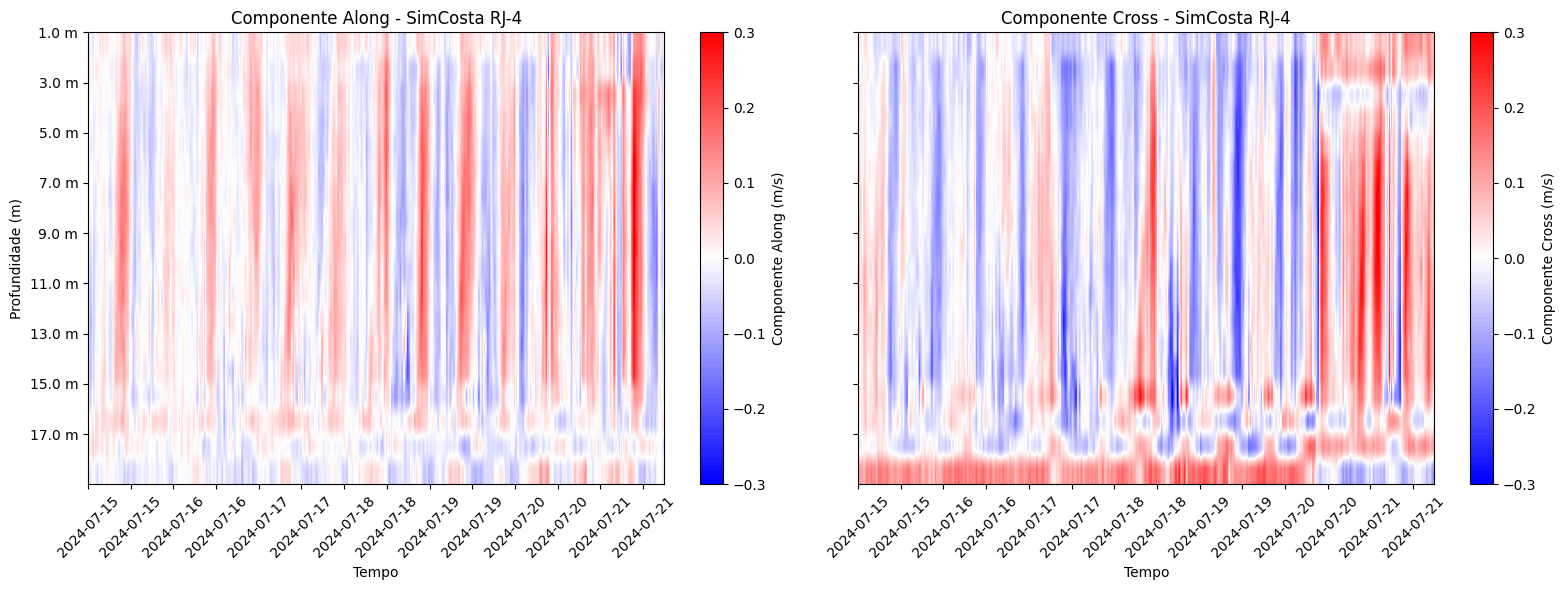

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Criar um colormap personalizado de azul para vermelho, passando por branco
colors = [(0, 0, 1), (1, 1, 1), (1, 0, 0)]  # Azul, Branco, Vermelho
n_bins = 100  # Número de gradientes no colormap
cmap_name = 'custom_blue_white_red'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Definir os limites da paleta de cores
vmin, vmax = -0.3, 0.3

# Plot duplo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot do along_component
img1 = ax1.imshow(along_component_df.T, aspect='auto', origin='lower', cmap=cm, extent=[0, len(along_component_df.index), 0, len(along_component_df.columns)], vmin=vmin, vmax=vmax)
fig.colorbar(img1, ax=ax1, label='Componente Along (m/s)')
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Profundidade (m)')
ax1.set_title('Componente Along - SimCosta RJ-4')

# Melhorar os rótulos do eixo X para mostrar datas reduzidas
ax1.set_xticks(ticks=np.arange(0, len(along_component_df.index), step=24))
ax1.set_xticklabels(along_component_df.index[::24].strftime('%Y-%m-%d'), rotation=45)
ax1.set_yticks(ticks=np.arange(0, len(along_component_df.columns), step=2))
ax1.set_yticklabels([f'{p:.1f} m' for p in profundidade[::2]])

# Inverter o eixo y
ax1.invert_yaxis()

# Plot do cross_component
img2 = ax2.imshow(cross_component_df.T, aspect='auto', origin='lower', cmap=cm, extent=[0, len(cross_component_df.index), 0, len(cross_component_df.columns)], vmin=vmin, vmax=vmax)
fig.colorbar(img2, ax=ax2, label='Componente Cross (m/s)')
ax2.set_xlabel('Tempo')
ax2.set_title('Componente Cross - SimCosta RJ-4')

# Melhorar os rótulos do eixo X para mostrar datas reduzidas
ax2.set_xticks(ticks=np.arange(0, len(cross_component_df.index), step=24))
ax2.set_xticklabels(cross_component_df.index[::24].strftime('%Y-%m-%d'), rotation=45)
ax2.set_yticks(ticks=np.arange(0, len(cross_component_df.columns), step=2))
ax2.set_yticklabels([f'{p:.1f} m' for p in profundidade[::2]])

# Inverter o eixo y
ax2.invert_yaxis()

plt.tight_layout()
plt.show()


Note que há diferenças bem interessantes aqui ! e podemos relacionar isso com os diferentes modos de variabilidade na coluna d'água !

Acredito que os próximos passos seriam: isolar determinadas profundidades (e/ou eventos) e fazer uma boa análise espectral ! Veja mais detalhes em https://github.com/andrebelem/1o_curso_ASTOC

Um curto exemplo - vou integrar a magnitude na coluna d'água e fazer uma wavelet

In [78]:
# primeiro instalando o waipy da Mabel Calim (ex-INPE) https://github.com/mabelcalim/waipy
!pip install git+https://github.com/mabelcalim/waipy.git

  Cloning https://github.com/mabelcalim/waipy.git to /tmp/pip-req-build-j13bi2qu
  Running command git clone --filter=blob:none --quiet https://github.com/mabelcalim/waipy.git /tmp/pip-req-build-j13bi2qu
  Resolved https://github.com/mabelcalim/waipy.git to commit bcba7430fb7f0de5f6732f74634d9ac11ebb380a
  Preparing metadata (setup.py) ... done


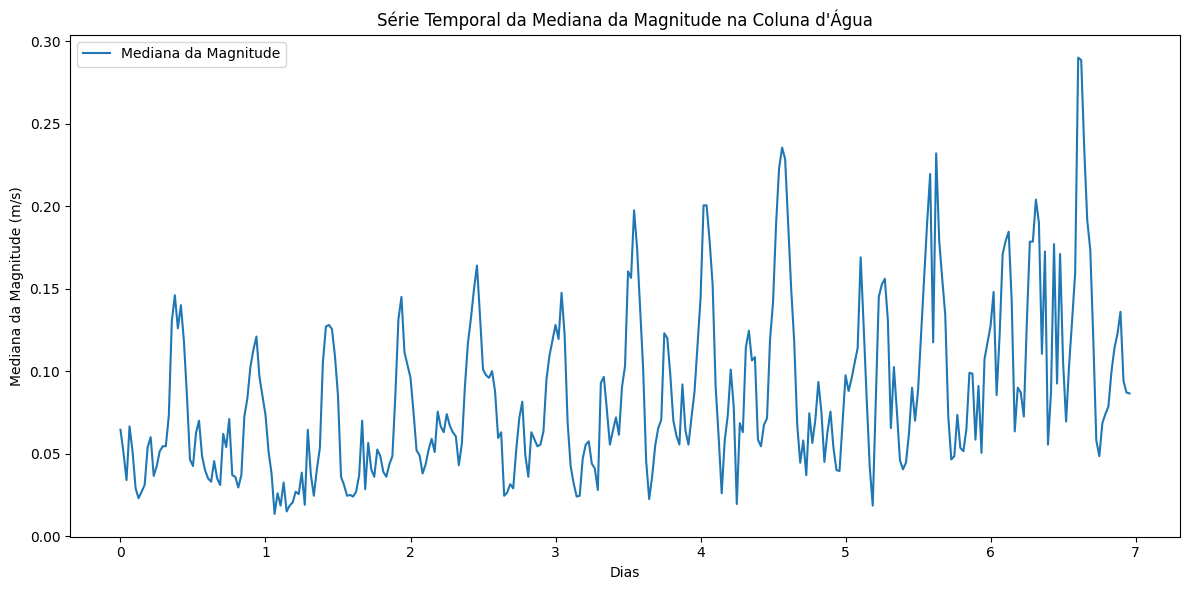

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'mag' é o dataframe das magnitudes e 'profundidade' é a array das profundidades
# Certifique-se de que ambos os dataframes têm o mesmo índice e as mesmas colunas

# Calcular a mediana da magnitude em toda a coluna d'água para cada instante de tempo
median_magnitude = mag.median(axis=1)

# Criar uma série temporal com a mediana
median_magnitude_series = pd.Series(median_magnitude, index=mag.index)

# Converter o índice para fração de dias
start_time = median_magnitude_series.index[0]
time_in_days = (median_magnitude_series.index - start_time).total_seconds() / 86400

# Plotar a série temporal da mediana
plt.figure(figsize=(12, 6))
plt.plot(time_in_days, median_magnitude_series, label='Mediana da Magnitude')
plt.xlabel('Dias')
plt.ylabel('Mediana da Magnitude (m/s)')
plt.title('Série Temporal da Mediana da Magnitude na Coluna d\'Água')
plt.legend()
plt.tight_layout()
plt.show()



In [80]:
# E agora a wavelet .... vou importar e normalizar...
import waipy
data_norm = waipy.normalize(median_magnitude.values)

In [81]:
# **NOTE** que isto é uma receita de bolo.....
T1 = 0 # define o início da série aqui - dia zero
time = time_in_days
dt = 0.5/24  # dias, porque sei que o dado é 30 min de delta-t

pad = 1         # preencha a série temporal com zeros (recomendado)
dj = 0.25       # isto fará 4 sub-oitavas por oitava
s0 = 2*dt       # isso diz começar em uma escala de 6 horas
j1 = 7/dj       # isso diz fazer 7 potências de dois com dj sub-oitavas cada
lag1 = 0.72     # lag-1 autocorrelação para ruído de fundo vermelho
param = 6
mother = 'Morlet'

Nr of Scales: 29
scales [0.041666666666666664, 0.049550296458446705, 0.05892556509887896, 0.07007470127114288, 0.08333333333333333, 0.09910059291689341, 0.11785113019775792, 0.14014940254228575, 0.16666666666666666, 0.19820118583378682, 0.23570226039551584, 0.2802988050845715, 0.3333333333333333, 0.39640237166757364, 0.4714045207910317, 0.560597610169143, 0.6666666666666666, 0.7928047433351473, 0.9428090415820634, 1.121195220338286, 1.3333333333333333, 1.5856094866702946, 1.8856180831641267, 2.242390440676572, 2.6666666666666665, 3.171218973340589, 3.7712361663282534, 4.484780881353144, 5.333333333333333, 6.342437946681178]


{'fig': <Figure size 4500x3000 with 5 Axes>,
 'ax_data': <Axes: title={'center': 'Mag_median'}, ylabel='Amplitude'>,
 'ax_cwt': <Axes: xlabel='Time', ylabel='Period'>,
 'ax_wavelet': <Axes: title={'center': '$\\psi$ (t/s) Morlet in time domain'}, xlabel='Time', ylabel='Amplitude'>,
 'ax_global_spectrum': <Axes: title={'center': 'Global Wavelet Spectrum'}, xlabel='Power'>}

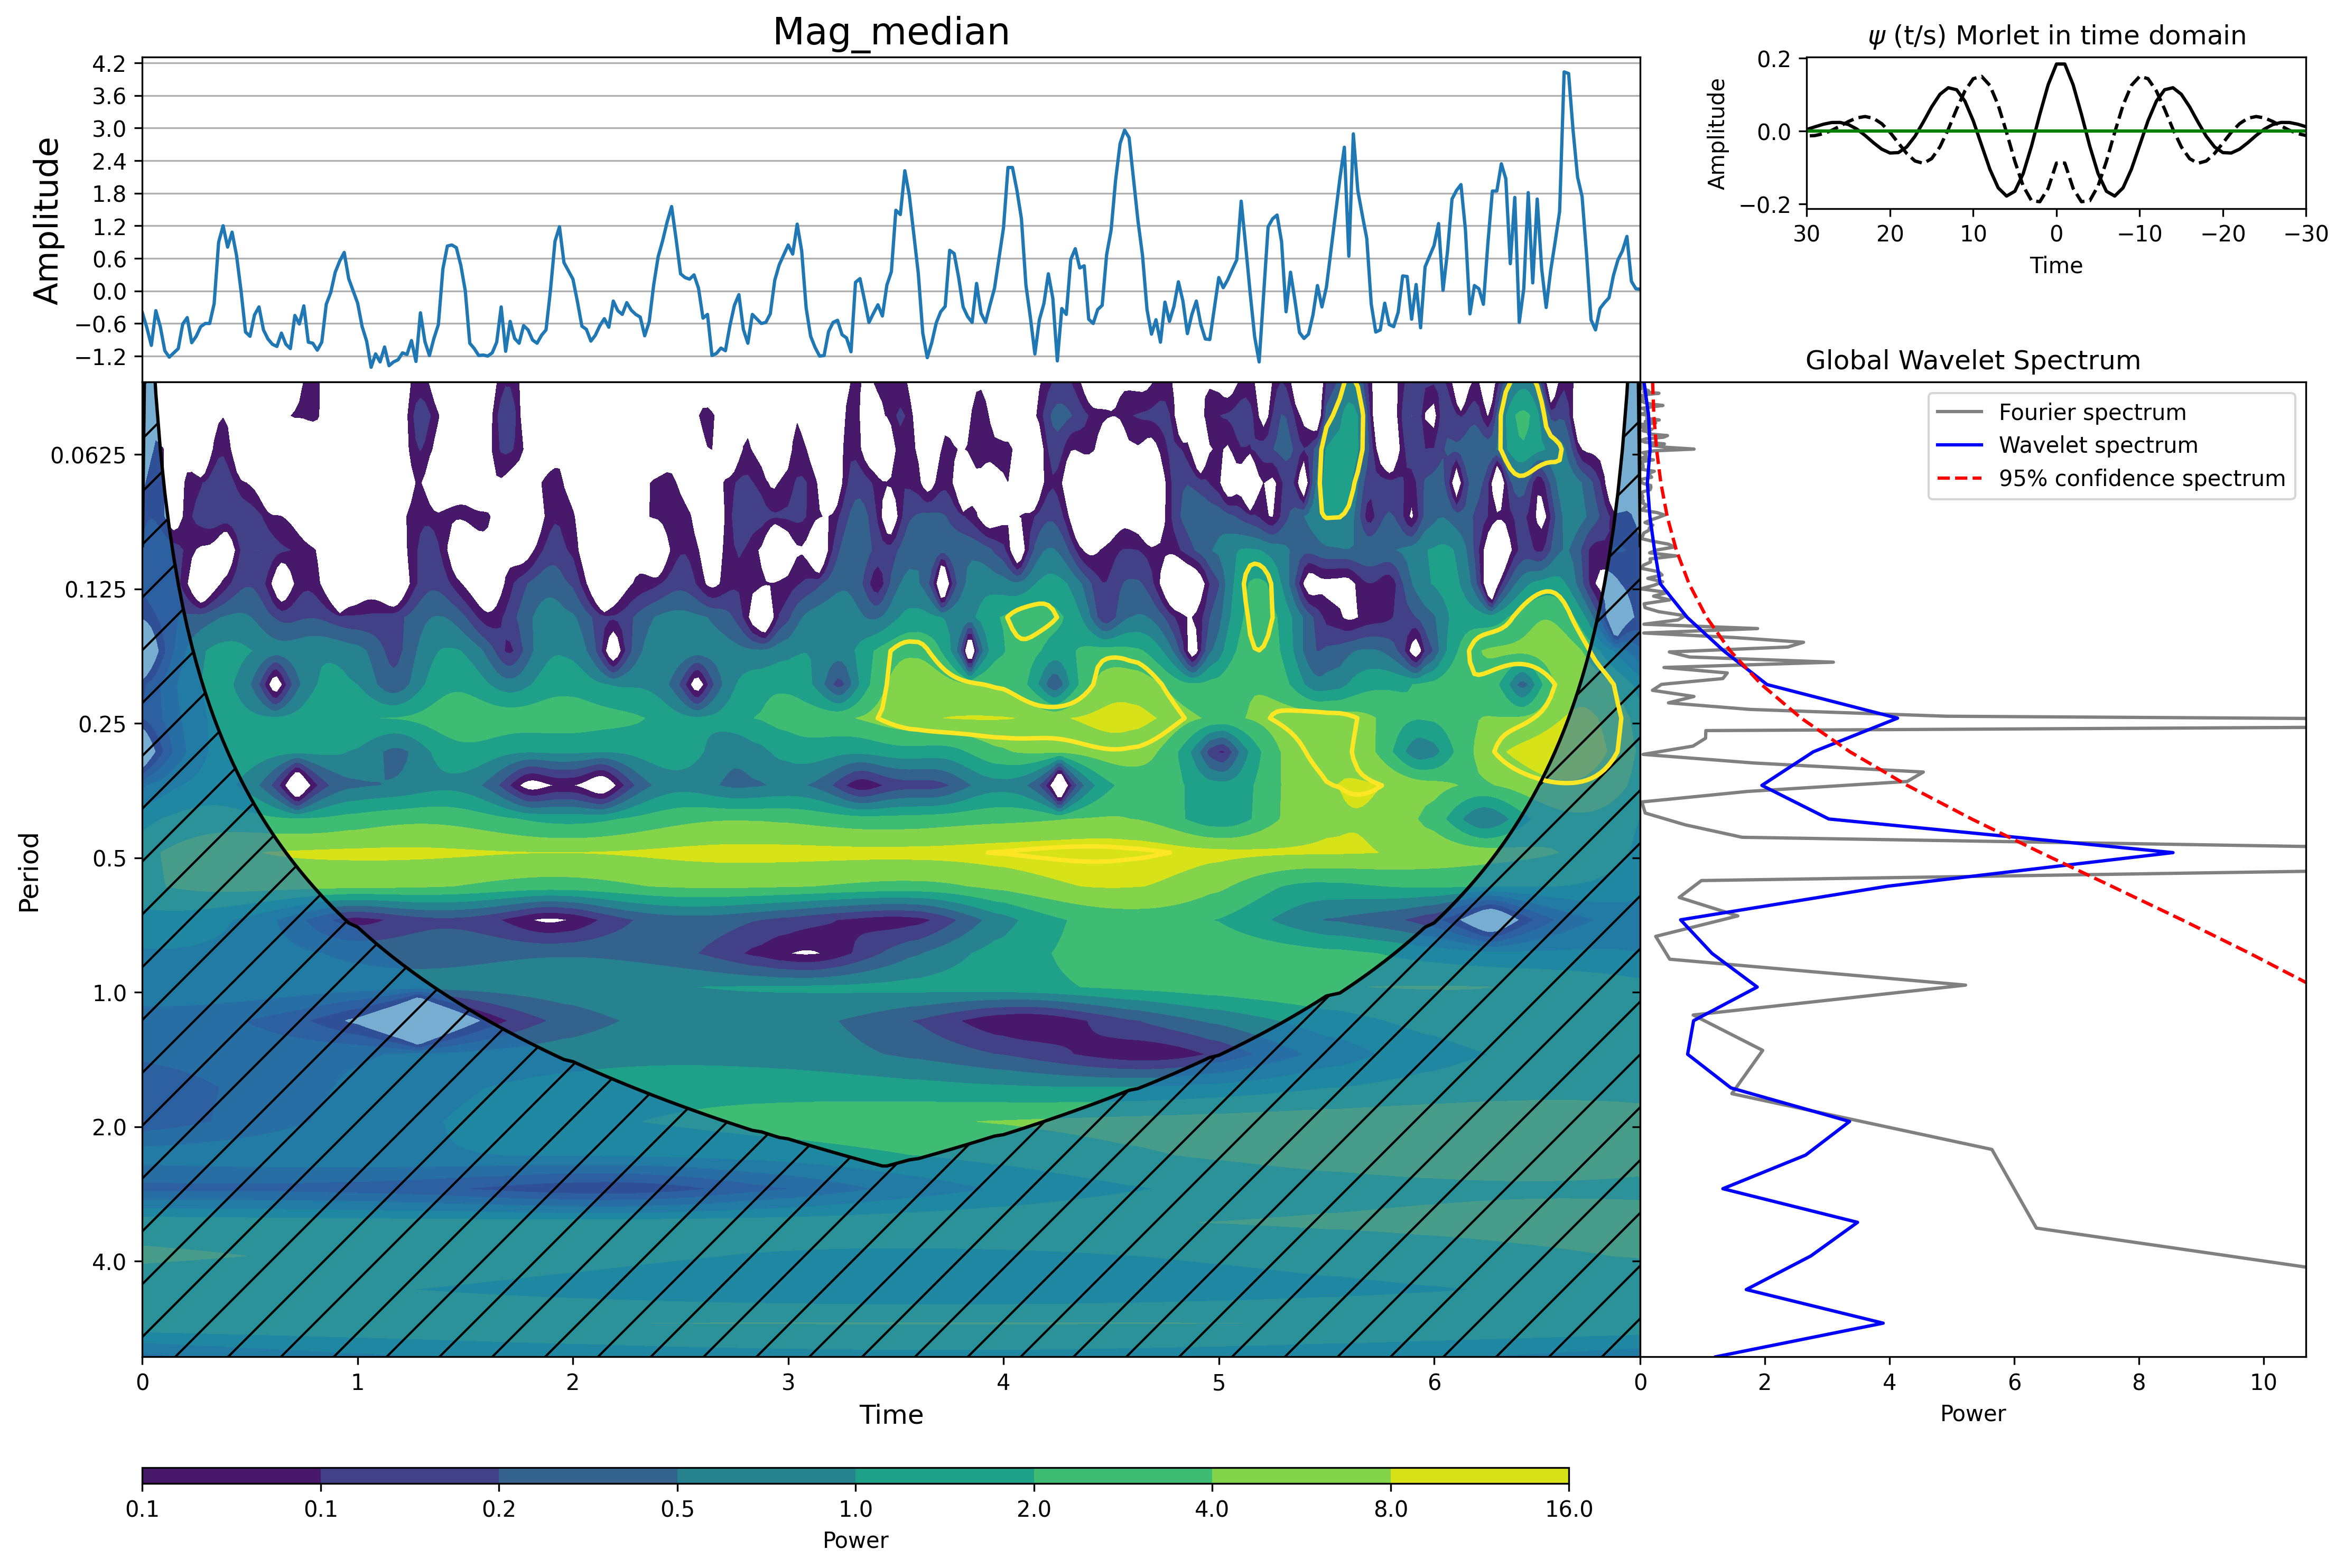

In [82]:
result = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='Magnitude SimCosta RJ-4')
var='Mag_median'
dtmin = 0.25/8    # dt/n of suboctaves
waipy.wavelet_plot(var, time, data_norm, dtmin, result)

Definitivamente, o céu é o limite .....

Aproveite esse material !